In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import statsmodels
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
%matplotlib inline
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
import numpy.random

%autocall

Automatic calling is: Smart


# Criando ruido:

In [2]:
# sinal moificado para o tamanho da série temporal de temp global média(1644):
t  = np.linspace(0, 240,1644)

In [3]:
sinal = .2*np.exp(t/100) + np.sin(2*np.pi*t/3.) + .8 * np.sin(2*np.pi*t/45.)  + 6 * numpy.random.random(size=1644) 

In [4]:
sinal

array([3.02232109, 3.25559667, 1.31593083, ..., 7.55680511, 7.41610659,
       5.65768797])

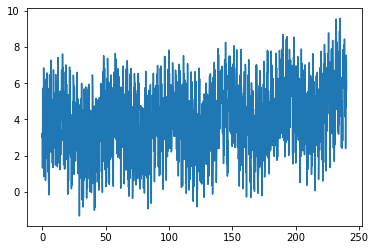

In [5]:
plt.plot(t,sinal)

[]

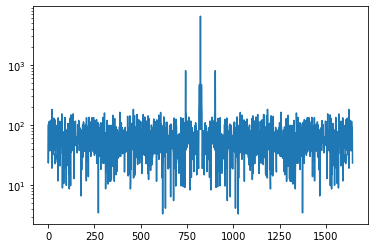

In [6]:
f = np.fft.fftfreq(1000)
plt.plot(abs( np.fft.fftshift( np.fft.fft(sinal)) ) )
plt.semilogy()

# Carregando série temporal para implementar ruido:

In [7]:
# Carregando os dados:
df=pd.read_csv('global_temp_monthly.csv')

# Carregando os dados:

df_temp=df.dropna()
df_temp= df_temp.set_index(['Date'])

df_temp.index = pd.to_datetime(df_temp.index, format='%Y-%m')
df_temp = df_temp[['Mean']].groupby('Date').sum()
df_temp.rename(columns={'Mean': 'Temperature'}, inplace = True)

df_temp.head(10)


,Temperature
Date,
1880-01-01,-0.2991
1880-02-01,-0.3329
1880-03-01,-0.3157
1880-04-01,-0.3199
1880-05-01,-0.2138
1880-06-01,-0.4592
1880-07-01,-0.3891
1880-08-01,-0.1525
1880-09-01,-0.2517


In [ ]:
df_temp.describe()
df_temp

In [ ]:
seasonplot = seasonal_decompose(df_temp)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

In [ ]:
df_temp.dtypes

In [ ]:
# criando df com sinal sintetico:

data_ruido=pd.DataFrame(sinal)
data_ruido

In [ ]:
# Somando sinal aos dados de temperatura da series:
sinal_total= df_temp[['Temperature']].values + data_ruido
sinal_total

In [ ]:
df_sinal=df_temp.drop('Temperature', axis=1)
df_sinal[['sinal']]=data_ruido.values

In [ ]:
df_sinal_total=df_temp.drop('Temperature', axis=1)
df_sinal_total[['sinal_total']]=sinal_total.values

In [ ]:
df_sinal

In [ ]:
df_sinal_total

In [ ]:
seasonplot = seasonal_decompose(df_sinal)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

In [ ]:
# 
seasonplot = seasonal_decompose(df_sinal_total)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1, ylabel='Observações') 
seasonplot.trend.plot(ax=ax2, ylabel='Tendência') 
seasonplot.seasonal.plot(ax=ax3, ylabel='Sazonalidade')
seasonplot.resid.plot(ax=ax4, ylabel='Ruído') 
plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_sinal.values.squeeze(), lags=100, ax=ax1)
sm.graphics.tsa.plot_pacf(df_sinal.values.squeeze(), lags= 100, ax=ax2, method='ywm')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_sinal.values.squeeze(), lags=100, ax=ax1)
sm.graphics.tsa.plot_pacf(df_sinal.values.squeeze(), lags= 100, ax=ax2, method='ywm')
plt.show()

# Sobre a decomposição: O modelo aditivo é Y[t] = T[t] + S[t] + e[t] O modelo multiplicativo é Y[t] = T[t] * S[t] * e[t]

# Os resultados são obtidos estimando primeiro a tendência aplicando um filtro de convolução aos dados. A tendência é então removida da série e a média desta série sem tendência para cada período é a componente sazonal devolvida.



In [8]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

register_matplotlib_converters()

In [9]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

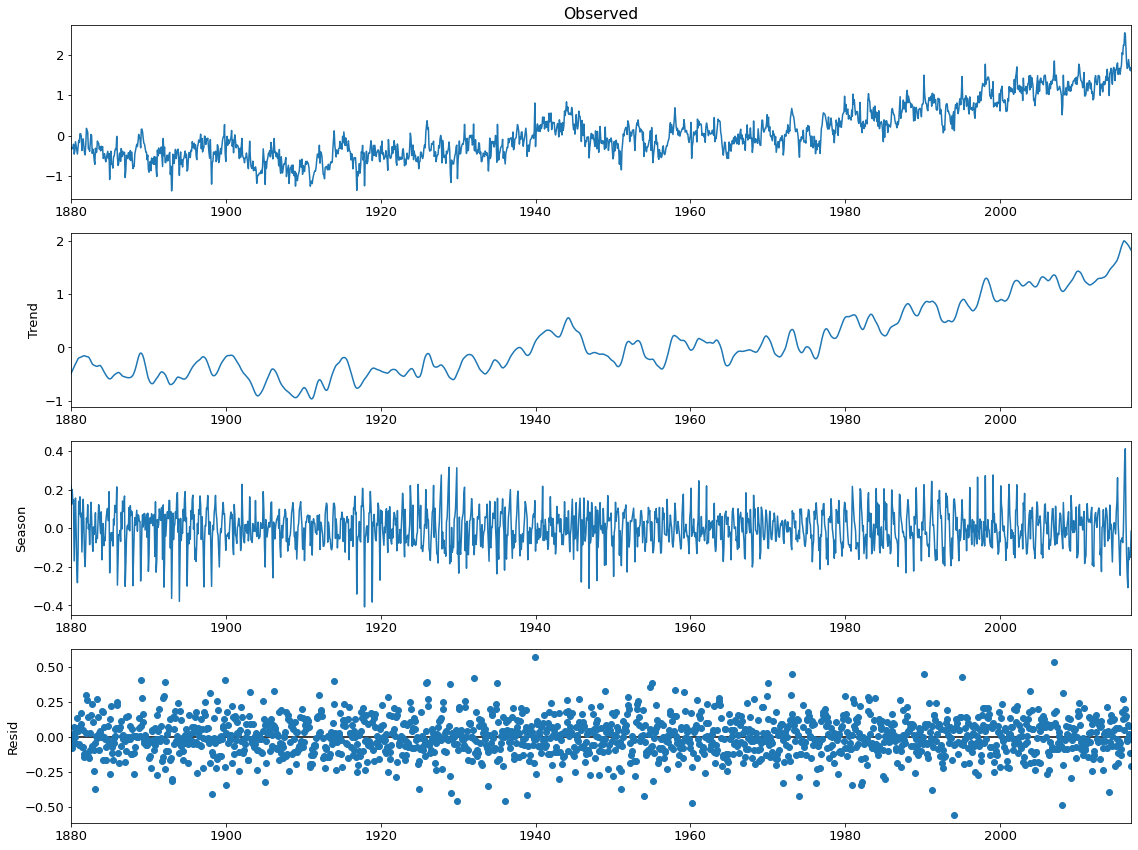

In [10]:
stl = STL(df_temp, seasonal=7)
res = stl.fit()
fig = res.plot()


In [ ]:
display(res.resid.head()) # residual component


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(res.resid.values.squeeze(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(res.resid.values.squeeze(), lags= 40, ax=ax2, method='ywm')
plt.show()

In [11]:
df2 = pd.read_excel("NGC7469_miri_tot_Jy.xlsx")
df2_teste=df2.drop('e', axis=1)

df2_teste

,Lambda,Flux
0,4.82190,0.22936
1,4.82289,0.22640
2,4.82387,0.22555
3,4.82485,0.22594
4,4.82584,0.22465
...,...,...
8617,28.12063,8.08428
8618,28.12654,8.28979
8619,28.13244,7.89948
8620,28.13834,7.58930


In [12]:
df2_teste=df2_teste.drop('Lambda', axis=1)
df2_teste

,Flux
0,0.22936
1,0.22640
2,0.22555
3,0.22594
4,0.22465
...,...
8617,8.08428
8618,8.28979
8619,7.89948
8620,7.58930


In [13]:
df2.dtypes

Lambda    float64
Flux      float64
e         float64
dtype: object

In [14]:
df2_teste

,Flux
0,0.22936
1,0.22640
2,0.22555
3,0.22594
4,0.22465
...,...
8617,8.08428
8618,8.28979
8619,7.89948
8620,7.58930


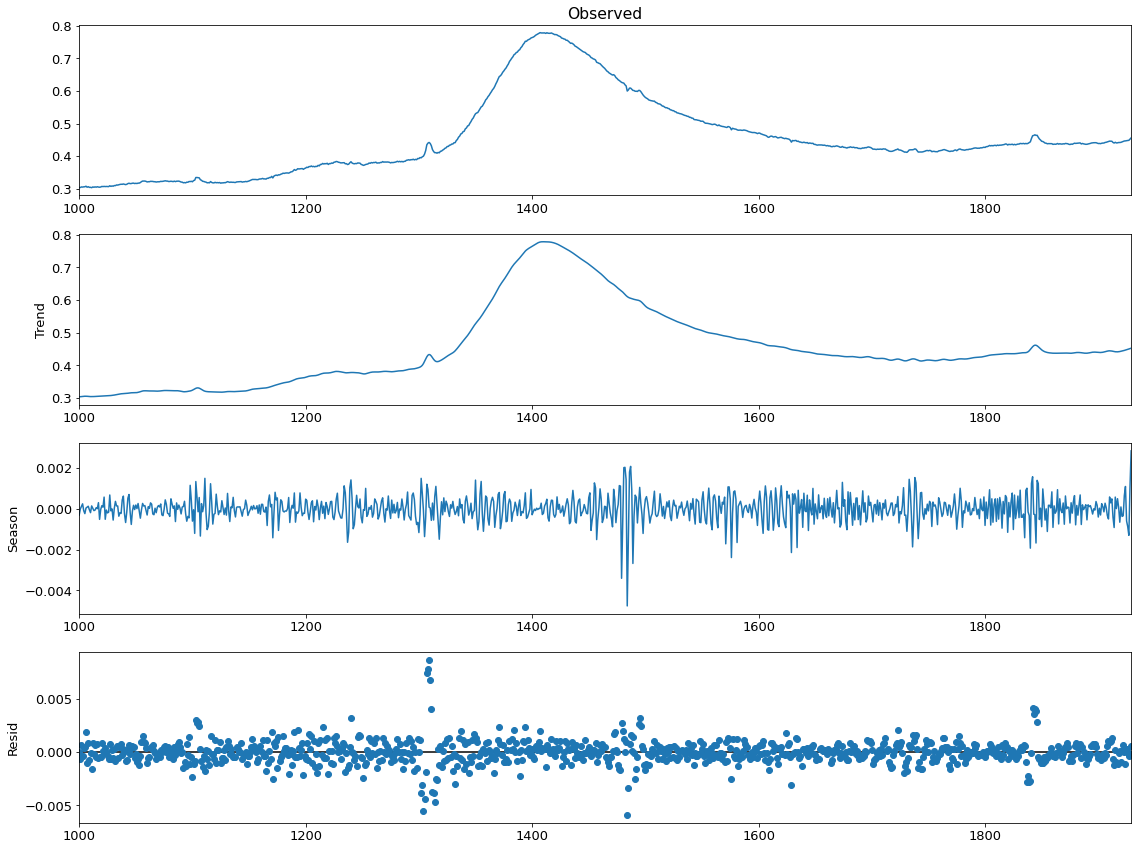

In [15]:
stl = STL(df2_teste[1000:1930], seasonal=5, period=5)
res2 = stl.fit()
fig = res2.plot()


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(res2.resid.values.squeeze(), lags=(40), ax=ax1)
sm.graphics.tsa.plot_pacf(res2.resid.values.squeeze(), lags=(40), ax=ax2, method='ywm')
plt.show()

In [ ]:
res2.trend

In [ ]:
# wallas

In [16]:
df3 = pd.read_excel("Wallas.xlsx")
#df2_teste=df2.drop('e', axis=1)

df3

,Lambda,Flux
0,7815.267949,4.790015e-16
1,7820.654904,5.466095e-16
2,7826.041859,4.914061e-16
3,7831.428814,4.704187e-16
4,7836.815769,5.068096e-16
...,...,...
1998,21022.725406,1.432826e-16
1999,21031.299837,1.501903e-16
2000,21039.874269,1.596695e-16
2001,21048.448700,1.642922e-16


In [17]:
df3_teste=df3.drop('Lambda', axis=1)

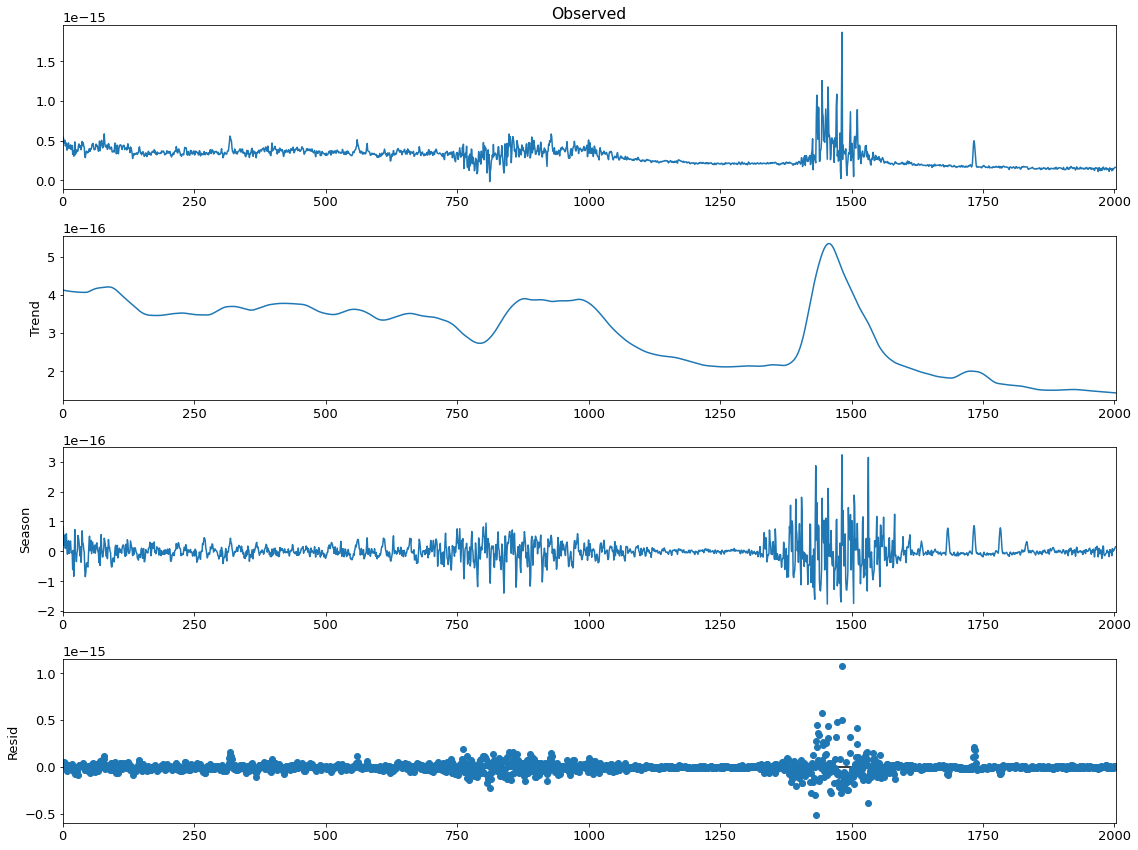

In [91]:
stl = STL(df3_teste, seasonal=7, period=50)
#stl = STL(df3_teste[1125:1400], seasonal=7, period=15)
res3 = stl.fit()
fig = res3.plot()


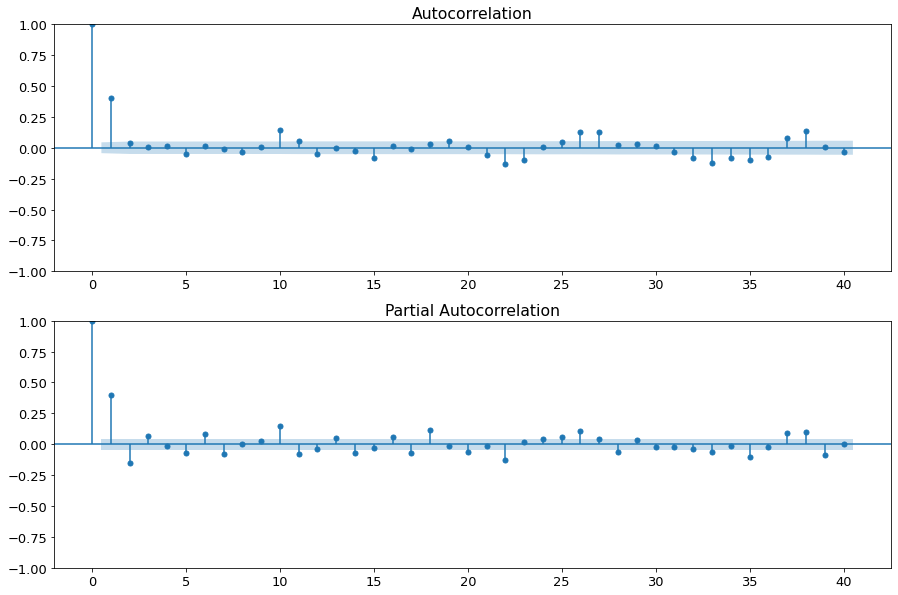

In [90]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(res3.resid.values.squeeze(), lags=(40), ax=ax1)
sm.graphics.tsa.plot_pacf(res3.resid.values.squeeze(), lags=(40), ax=ax2, method='ywm')
plt.show()